In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

C:\Users\claud\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_excel('pitchers_final.xlsx', index_col=0)
df.head()

,player_id,year,er,h,so,bb,ibb,hbp,ipouts,g,tps,dps,playeryear
0,aberal01,1955,30,86,37,28,1,0,240,39,9739,-122738,aberal-1955
1,aberal01,1956,24,65,21,25,6,2,189,42,4996,-111990,aberal-1956
2,aberal01,1957,32,52,15,13,3,1,120,31,1174,-106701,aberal-1957
3,abernte02,1955,79,136,79,67,1,7,358,40,11603,-120874,abernte-1955
4,abernte02,1956,14,35,18,10,0,1,91,5,2208,-114778,abernte-1956


In [3]:
# Add 'playeryear' column which will be the grain of the data. Save for next time.
if 'playeryear' not in df.columns:
    df['playeryear'] = [str(df.iloc[i]['player_id'])[:-2] + '-' + str(df.iloc[i]['year']) 
                        for i in range(len(df))]

    df.to_excel('pitchers_final.xlsx')

In [4]:
df.head()

,player_id,year,er,h,so,bb,ibb,hbp,ipouts,g,tps,dps,playeryear
0,aberal01,1955,30,86,37,28,1,0,240,39,9739,-122738,aberal-1955
1,aberal01,1956,24,65,21,25,6,2,189,42,4996,-111990,aberal-1956
2,aberal01,1957,32,52,15,13,3,1,120,31,1174,-106701,aberal-1957
3,abernte02,1955,79,136,79,67,1,7,358,40,11603,-120874,abernte-1955
4,abernte02,1956,14,35,18,10,0,1,91,5,2208,-114778,abernte-1956


In [5]:
df = df.sort_values('dps', ascending=False)
df.head(5)

,player_id,year,er,h,so,bb,ibb,hbp,ipouts,g,tps,dps,playeryear
2264,gibsobo01,1968,38,198,268,62,6,7,914,34,682458,255959,gibsobo-1968
682,koufasa01,1965,76,216,382,71,4,5,1007,43,561605,255697,koufasa-1965
11282,goodedw01,1985,47,198,268,69,4,2,830,35,427057,210850,goodedw-1985
680,koufasa01,1963,65,214,306,58,7,3,933,40,467065,203760,koufasa-1963
683,koufasa01,1966,62,241,317,77,4,0,969,41,475935,192479,koufasa-1966


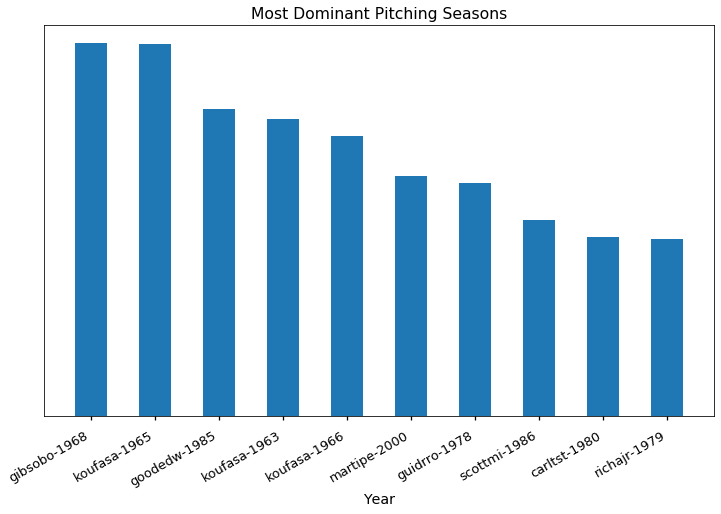

In [6]:
# Sample plot of the top 10 DPS.

plt.style.use('seaborn-talk')
fig, ax = plt.subplots(figsize=(12,8))

dps_sorted_df = df[df['dps'] > 0].head(10)

ax.bar(x='playeryear', height='dps', width=.5, data=dps_sorted_df)

ax.set_title('Most Dominant Pitching Seasons')
ax.set_xlabel('Year')
ax.get_yaxis().set_visible(False)

fig.autofmt_xdate()

plt.savefig('images/top10dps.png');

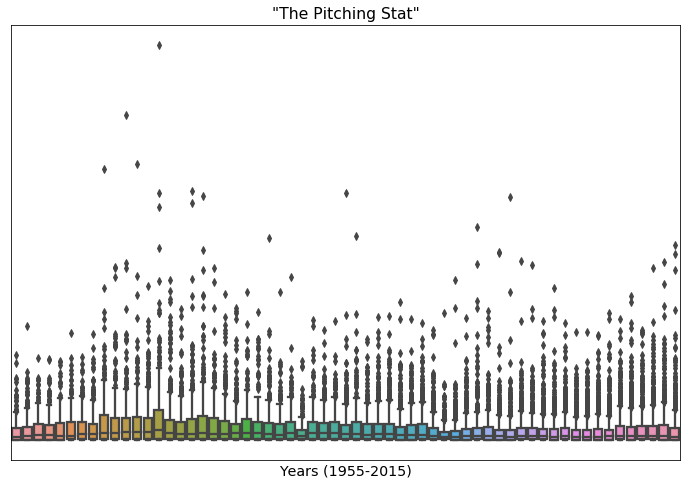

In [7]:
# Boxplot for each year in the dataset.

fig, ax = plt.subplots(figsize=(12, 8))

ax = sns.boxplot(x='year', y='tps', data=df)

ax.get_yaxis().set_visible(False)

ax.get_xaxis().set_ticks([])
ax.set_xlabel('Years (1955-2015)')

ax.set_title('"The Pitching Stat"')

plt.savefig('images/boxtps.png');

In [8]:
# Create df of top two TPS per year
df_lst = [df[df['year'] == year].sort_values('tps', ascending=False).head(2) 
          for year in df.year.unique()]
top2_df = pd.concat(df_lst)
top2_df.head()

,player_id,year,er,h,so,bb,ibb,hbp,ipouts,g,tps,dps,playeryear
2264,gibsobo01,1968,38,198,268,62,6,7,914,34,682458,255959,gibsobo-1968
4034,tiantlu01,1968,46,152,264,73,4,4,775,34,426499,0,tiantlu-1968
682,koufasa01,1965,76,216,382,71,4,5,1007,43,561605,255697,koufasa-1965
2965,mcdowsa01,1965,66,178,325,132,7,6,819,42,305908,0,mcdowsa-1965
11282,goodedw01,1985,47,198,268,69,4,2,830,35,427057,210850,goodedw-1985


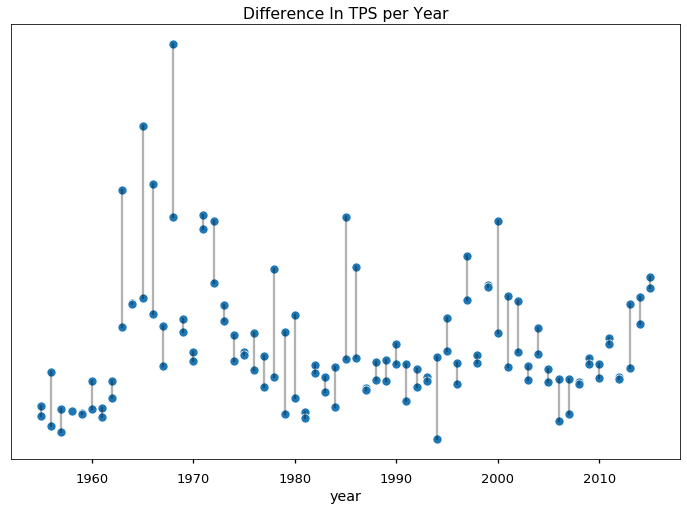

In [9]:
# Plot the difference between the top two TPS per year.

fig, ax = plt.subplots(figsize=(12, 8))

ax = sns.scatterplot(x='year', y='tps', alpha=1, data=top2_df, ax=ax)

for year in top2_df.year.unique():
    y1 = top2_df[top2_df['year'] == year]['tps'].iloc[0]
    y2 = top2_df[top2_df['year'] == year]['tps'].iloc[1]
    plt.plot([year, year], [y1, y2], c='black', alpha=0.3)
    
ax.get_yaxis().set_visible(False)
ax.set_title('Difference In TPS per Year')

plt.savefig('images/tpsdiff.png');

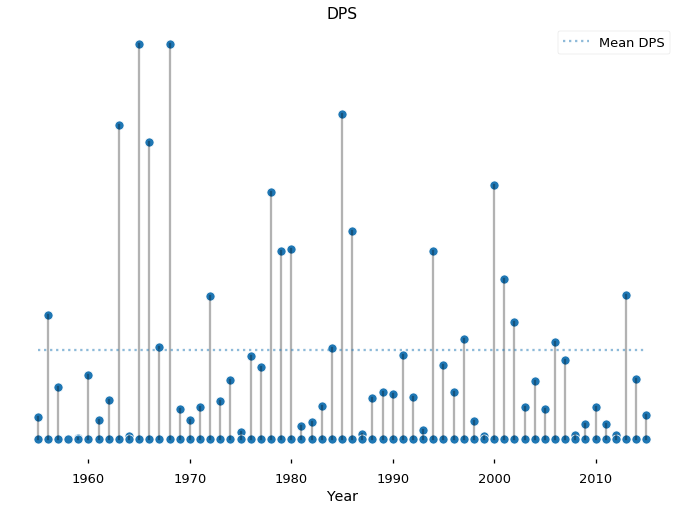

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

ax = sns.scatterplot(x='year', y='dps', data=top2_df, ax=ax)

ax.set_title('DPS')
for year in top2_df.year.unique():
    y1 = top2_df[top2_df['year'] == year]['dps'].iloc[0]
    y2 = top2_df[top2_df['year'] == year]['dps'].iloc[1]
    plt.plot([year, year], [y1, y2], c='black', alpha=0.3)

avg = top2_df[top2_df.dps > 0].dps.mean()
avg_line = plt.plot([1955, 2015], [avg, avg], alpha=0.5, ls='dotted')

ax.get_yaxis().set_visible(False)
ax.set_xlabel('Year')

for spine in ax.spines:
    ax.spines[spine].set_visible(False)

ax.legend(avg_line, ['Mean DPS'])

plt.savefig('images/dpslollipop.png');

In [11]:
# Sorting tps / dps with tail because barh charts blot bottom-to-top.
top_tps = df.sort_values('tps').tail(10)
top_dps = df.sort_values('dps').tail(10)

In [12]:
# Setting colors to highlight Koufax
colors1 = ['#3366ff' if x.startswith('koufa') else 'lightgrey' for x in top_tps.playeryear]
colors2 = ['#3366ff' if x.startswith('koufa') else 'lightgrey' for x in top_dps.playeryear]

In [13]:
def label_bars(ax):
    """Add value labels to the bars (instead of an x-axis)."""
    
    # Iterate over the rectangle objects that we've charted.
    for rect in ax.patches:
        # Determine the placement of the labels.
        x_val = rect.get_width()
        y_val = rect.get_y() + rect.get_height() / 2
        label = round(rect.get_width() / 10000, 2)
        
        # Create annotation
        ax.annotate(label, (x_val, y_val), xytext=(0, 0), 
                     textcoords="offset points", 
                     va='center', ha='right')

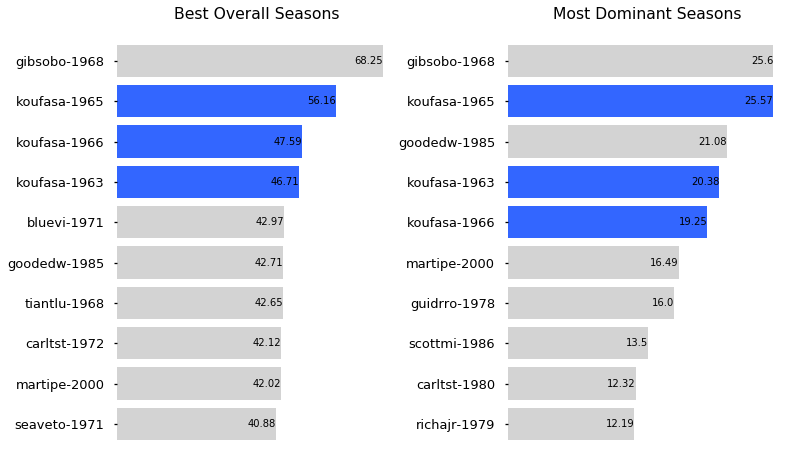

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 8))
fig.subplots_adjust(wspace=.4)

ax1.barh(y='playeryear', width='tps', color=colors1, data=top_tps)
ax1.set_title('Best Overall Seasons')

ax2.barh(y='playeryear', width='dps', color=colors2, data=top_dps)
ax2.set_title('Most Dominant Seasons')

for ax in (ax1, ax2):
    ax.get_xaxis().set_visible(False)
    for spine in ax1.spines:
        ax.spines[spine].set_visible(False)
    
    label_bars(ax)

        
plt.savefig('images/koufax.png');